파일 찾기: C:/Users/qkrtj/OneDrive/바탕 화면/teamproject/team1.csv

ANOVA for Month:
   F-statistic: [ 2.6735587   2.53787842  1.79805724 10.0484867 ]
   p-value: [2.49913103e-03 4.11295899e-03 5.21572548e-02 2.57375707e-16]


ANOVA for Day:
   F-statistic: [1.97362873 2.41709966 2.08831221 6.62112551]
   p-value: [9.75815630e-02 4.80638855e-02 8.14424232e-02 3.53949876e-05]


ANOVA for Holiday:
   F-statistic: [ 1.08520364  6.15108527 11.64127251  4.17719294]
   p-value: [0.29811901 0.01351323 0.00070579 0.04157748]


ANOVA for Highest_temp:
   F-statistic: [1.06889912 0.80255215 0.98824465 1.62005821]
   p-value: [3.17127401e-01 9.46462480e-01 5.37038380e-01 2.94217442e-04]


ANOVA for Lowest_temp:
   F-statistic: [1.2530726  0.8150124  1.06489787 1.163125  ]
   p-value: [0.05284288 0.93294067 0.32706266 0.13917591]


ANOVA for Rainfall:
   F-statistic: [0.6769857  1.07340517 1.13464271 1.25550664]
   p-value: [0.98340992 0.32701729 0.21902128 0.08348842]


ANOVA for Sejong:
   F-statistic: 

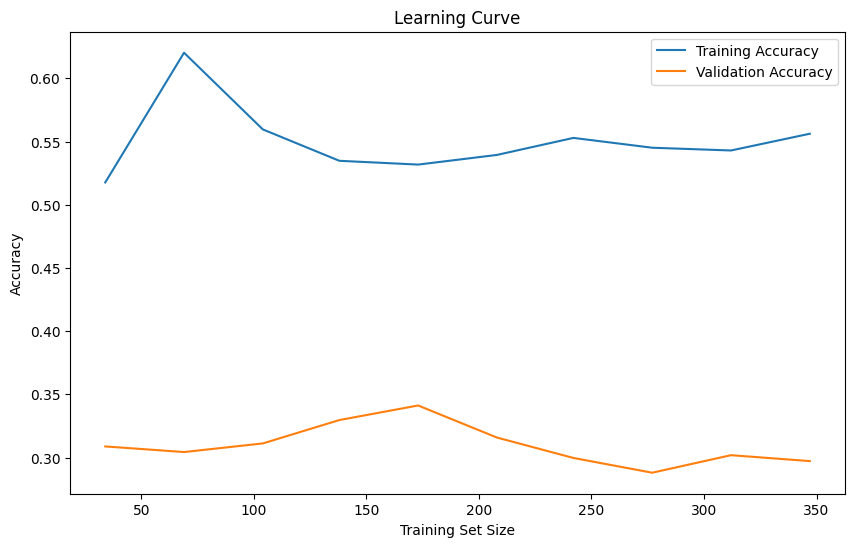

In [1]:
import tkinter as tk
from tkinter import ttk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from scipy.stats import f_oneway
import pandas as pd
import tkinter.filedialog as filedialog  # 이 부분을 추가
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

class MachineLearningApp:
    def __init__(self, root):
        self.root = root
        self.root.title("카페 매출 예상하기")

        self.algorithm_label = ttk.Label(root, text="적용할 알고리즘을 선택하세요.")
        self.algorithm_label.grid(row=0, column=0, padx=10, pady=10, sticky=tk.W)

        self.algorithm_var = tk.StringVar()
        self.algorithm_combobox = ttk.Combobox(root, textvariable=self.algorithm_var, values=['one_rule','naive_bayes', 'decision_tree', 'knn', 'random_forest', 'svm', 'logistic_regression'])
        self.algorithm_combobox.grid(row=0, column=1, padx=10, pady=10, sticky=tk.W)

        self.browse_button = ttk.Button(root, text="파일 찾기", command=self.load_data)
        self.browse_button.grid(row=1, column=0, padx=10, pady=10, sticky=tk.W)

        self.predict_button = ttk.Button(root, text="적용", command=self.predict)
        self.predict_button.grid(row=1, column=1, padx=10, pady=10, sticky=tk.W)

        self.accuracy_label = ttk.Label(root, text="정확도")
        self.accuracy_label.grid(row=2, column=0, padx=10, pady=10, sticky=tk.W)

        self.accuracy_var = tk.StringVar()
        self.accuracy_entry = ttk.Entry(root, textvariable=self.accuracy_var, state='readonly')
        self.accuracy_entry.grid(row=2, column=1, padx=10, pady=10, sticky=tk.W)

        self.prediction_label = ttk.Label(root, text="예측값")
        self.prediction_label.grid(row=3, column=0, padx=10, pady=10, sticky=tk.W)

        self.prediction_var = tk.StringVar()
        self.prediction_entry = ttk.Entry(root, textvariable=self.prediction_var, state='readonly')
        self.prediction_entry.grid(row=3, column=1, padx=10, pady=10, sticky=tk.W)
        
        self.prediction_label = ttk.Label(root, text="MON : 1\nTUE : 2\nWED : 3\nTHU : 4\nFRI : 5", justify='center')
        self.prediction_label.grid(row=5, column=2, padx=10, pady=10, sticky=tk.W)

        self.prediction_label = ttk.Label(root, text="Yes : 1\nNo : 0",justify='center')
        self.prediction_label.grid(row=6, column=2, padx=10, pady=10, sticky=tk.W)

        self.prediction_label = ttk.Label(root, text="Yes : 1\nNo : 0", justify='center')
        self.prediction_label.grid(row=10, column=2, padx=10, pady=10, sticky=tk.W)

        self.prediction_label = ttk.Label(root, text="Yes : 1\nNo : 0", justify='center')
        self.prediction_label.grid(row=11, column=2, padx=10, pady=10, sticky=tk.W)
        
        self.clear_button = ttk.Button(root, text="초기화", command=self.clear_inputs)
        self.clear_button.grid(row=1, column=2, padx=10, pady=10, sticky=tk.W)

        self.entry_labels = []
        self.entry_vars = []

        self.file_path = ""
        

    def load_data(self):
        self.file_path = filedialog.askopenfilename(filetypes=[('CSV Files', '*.csv')])
        print(f"파일 찾기: {self.file_path}")
    
    def clear_inputs(self):
        # 초기화 버튼이 눌렸을 때 호출되는 함수
        self.algorithm_var.set("")  # 알고리즘 선택 초기화
        self.file_path = ""  # 파일 경로 초기화
        self.accuracy_var.set("")  # 정확도 엔트리 초기화
        self.prediction_var.set("")  # 예측값 엔트리 초기화

        # 입력 엔트리 초기화
        for entry_var in self.entry_vars:
            entry_var.set("")
            
        
            
    def learning_curve_plot(self, model, X, y):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
        )

        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
        plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
        plt.xlabel('Training Set Size')
        plt.ylabel('Accuracy')
        plt.title('Learning Curve')
        plt.legend()
        plt.show()

    def predict(self):
        if not self.file_path:
            print("CSV파일을 선택해주세요.")
            return
        
        print("===========================================================================\n")
        
        algorithm = self.algorithm_var.get()

        # Load CSV data
        data = pd.read_csv(self.file_path)

        # Feature and target separation
        X = data.drop('Sales', axis=1)
        y = data['Sales']

        # One-hot encoding for categorical features
        X = pd.get_dummies(X)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # ANOVA
        self.anova(X_train, y_train)

        # Get user input for test data
        test_data = {}
        for i, feature in enumerate(X.columns):
            value = float(self.entry_vars[i].get())
            test_data[feature] = [value]

        new_data_df = pd.DataFrame(test_data)

        # Train the selected algorithm
        model = self.train_classifier(X_train, y_train, algorithm)
        
        
        self.learning_curve_plot(model, X_train, y_train)

        # Predict using user-input test data
        prediction = model.predict(new_data_df)

        # Display prediction
        self.prediction_var.set(prediction[0])

        # Calculate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Display accuracy
        self.accuracy_var.set(f"{accuracy:.4f}")
        
    def anova(self, X, y):
        # Convert 'Sales' column to dummy variables
        y = pd.get_dummies(y, drop_first=True)
        
        # One-hot encoding for categorical features
        X = pd.get_dummies(X)

        for column in X.columns:
            categories = X[column].unique()
            anova_result = f_oneway(*[y[X[column] == category] for category in categories])

            print(f"ANOVA for {column}:")
            print(f"   F-statistic: {anova_result.statistic}")
            print(f"   p-value: {anova_result.pvalue}")
            print("\n")
    

    def train_classifier(self, X_train, y_train, algorithm):
        if algorithm == 'naive_bayes':
            model = GaussianNB()
        elif algorithm == 'decision_tree':
            model = DecisionTreeClassifier()
        elif algorithm == 'knn':
            model = KNeighborsClassifier(n_neighbors=5)
        elif algorithm == 'random_forest':
            model = RandomForestClassifier(n_estimators=100, random_state=42)
        elif algorithm == 'svm':
            model = SVC(kernel='rbf', C=1.0, gamma='scale')
        elif algorithm == 'logistic_regression':
            model = LogisticRegression(max_iter=1000)
        elif algorithm == 'one_rule':
            model = DummyClassifier(strategy='most_frequent')
        else:
            raise ValueError(f"Invalid algorithm choice '{algorithm}'. Please choose a valid algorithm.")

        model.fit(X_train, y_train)
        return model

    def create_input_entries(self, features):
        for i, feature in enumerate(features):
            label = ttk.Label(self.root, text=f"{feature}:")
            label.grid(row=4 + i, column=0, padx=10, pady=5, sticky=tk.W)
            entry_var = tk.StringVar()
            entry = ttk.Entry(self.root, textvariable=entry_var)
            entry.grid(row=4 + i, column=1, padx=10, pady=5, sticky=tk.W)
            self.entry_labels.append(label)
            self.entry_vars.append(entry_var)
            


if __name__ == "__main__":
    root = tk.Tk()
    app = MachineLearningApp(root)
    features = ['Month', 'Day', 'Holiday', 'Highest_temp', 'Lowest_temp', 'Rainfall', 'Sejong', 'Gwanghwamun']
    app.create_input_entries(features)
    root.mainloop()